In [ ]:
#install Python bindings
!pip install openai

In [ ]:
!pip install spacy && python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 871.1 kB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#install libraries
#requests library minizes the code we need to write to make HTTP requests

import requests
import os
import json
import logging
import openai
import textwrap
import csv
import pandas as pd
import matplotlib.pyplot as plt
import spacy

from openai import OpenAI


In [ ]:
#check if node.js is installed


if os.path.exists("/tools/node/") == False:
  !apt install nodejs
  !npm i -g npm
else:
  !echo "nodejs Already installed"

nodejs Already installed


In [9]:
#set your key
#replace with your API key
#make sure you don't make your API key publicly available

%env OPENAI_API_KEY = ##"
OPENAI_API_KEY = ##"

SyntaxError: invalid syntax (<ipython-input-9-7749bac3086b>, line 6)

In [ ]:
import openai
import os

# Ensure the API key is set
api_key = OPENAI_API_KEY

# Set up OpenAI client
client = openai.OpenAI(api_key=api_key)

# Fetch the list of available models
models = client.models.list()

# Print available models
print(models)

SyncPage[Model](data=[Model(id='gpt-4.5-preview', created=1740623059, object='model', owned_by='system'), Model(id='gpt-4.5-preview-2025-02-27', created=1740623304, object='model', owned_by='system'), Model(id='gpt-4o-mini-audio-preview-2024-12-17', created=1734115920, object='model', owned_by='system'), Model(id='dall-e-3', created=1698785189, object='model', owned_by='system'), Model(id='dall-e-2', created=1698798177, object='model', owned_by='system'), Model(id='gpt-4o-audio-preview-2024-10-01', created=1727389042, object='model', owned_by='system'), Model(id='gpt-4o-audio-preview', created=1727460443, object='model', owned_by='system'), Model(id='gpt-4o-mini-realtime-preview-2024-12-17', created=1734112601, object='model', owned_by='system'), Model(id='gpt-4o-mini-realtime-preview', created=1734387380, object='model', owned_by='system'), Model(id='o1-mini-2024-09-12', created=1725648979, object='model', owned_by='system'), Model(id='o1-mini', created=1725649008, object='model', own

In [ ]:
import openai
import os

# Set the API key explicitly
api_key = ""  # Replace with your actual project API key
client = openai.OpenAI(api_key=api_key)

# Test API access
try:
    models = client.models.list()
    print("API Key is working! Available models:", models)
except Exception as e:
    print("Error:", e)

API Key is working! Available models: SyncPage[Model](data=[Model(id='gpt-4.5-preview', created=1740623059, object='model', owned_by='system'), Model(id='gpt-4.5-preview-2025-02-27', created=1740623304, object='model', owned_by='system'), Model(id='gpt-4o-mini-audio-preview-2024-12-17', created=1734115920, object='model', owned_by='system'), Model(id='dall-e-3', created=1698785189, object='model', owned_by='system'), Model(id='dall-e-2', created=1698798177, object='model', owned_by='system'), Model(id='gpt-4o-mini-2024-07-18', created=1721172717, object='model', owned_by='system'), Model(id='gpt-4o-audio-preview-2024-10-01', created=1727389042, object='model', owned_by='system'), Model(id='gpt-4o-audio-preview', created=1727460443, object='model', owned_by='system'), Model(id='gpt-4o-mini-realtime-preview-2024-12-17', created=1734112601, object='model', owned_by='system'), Model(id='gpt-4o-mini', created=1721172741, object='model', owned_by='system'), Model(id='gpt-4o-mini-realtime-pre

In [ ]:
import requests

test_url = "https://api.openai.com/v1/models"
headers = {"Authorization": f"Bearer your_api_key_here"}  # Replace with your key

response = requests.get(test_url, headers=headers)
print(response.status_code, response.json())

200 {'object': 'list', 'data': [{'id': 'gpt-4.5-preview', 'object': 'model', 'created': 1740623059, 'owned_by': 'system'}, {'id': 'gpt-4.5-preview-2025-02-27', 'object': 'model', 'created': 1740623304, 'owned_by': 'system'}, {'id': 'gpt-4o-mini-audio-preview-2024-12-17', 'object': 'model', 'created': 1734115920, 'owned_by': 'system'}, {'id': 'dall-e-3', 'object': 'model', 'created': 1698785189, 'owned_by': 'system'}, {'id': 'dall-e-2', 'object': 'model', 'created': 1698798177, 'owned_by': 'system'}, {'id': 'gpt-4o-mini-2024-07-18', 'object': 'model', 'created': 1721172717, 'owned_by': 'system'}, {'id': 'gpt-4o-audio-preview-2024-10-01', 'object': 'model', 'created': 1727389042, 'owned_by': 'system'}, {'id': 'gpt-4o-audio-preview', 'object': 'model', 'created': 1727460443, 'owned_by': 'system'}, {'id': 'gpt-4o-mini-realtime-preview-2024-12-17', 'object': 'model', 'created': 1734112601, 'owned_by': 'system'}, {'id': 'gpt-4o-mini', 'object': 'model', 'created': 1721172741, 'owned_by': 'sy

In [ ]:
# function to open a file and return it's contents as a string
def open_file(filepath):
  with open(filepath, 'r', encoding='utf-8') as infile:
    return infile.read()

#function to save the content to a file
def save_file(filepath, content):
  with open(filepath, 'a', encoding='utf_8') as outfile:
    outfile.write(content)

api_key = OPENAI_API_KEY

openai.api_key = api_key

#open the file and process
with open('/content/drive/MyDrive/data/ielts_training_data_short.jsonl', 'rb') as file:
  response = openai.files.create(
      file = file,
      purpose = 'fine-tune'
  )

file_id = response.id
print(f"file uploaded successfully with ID: {file_id}")

file uploaded successfully with ID: file-SqFLQMEtu4Tm73nnDAR7yh


In [ ]:
from openai import OpenAI
client = OpenAI()

client = openai.OpenAI(api_key= OPENAI_API_KEY)

# Start fine-tuning
try:
    fine_tune_job = client.fine_tuning.jobs.create(
        training_file=file_id,  # Replace with actual file ID
        model="gpt-4o-2024-08-06"  # Use a supported fine-tunable model
    )
    print("Fine-tuning job created:", fine_tune_job)
except Exception as e:
    print("Error:", e)

Fine-tuning job created: FineTuningJob(id='ftjob-w1YsTyvAS7xngMm8RwqAifY1', created_at=1741407790, error=Error(code=None, message=None, param=None), fine_tuned_model=None, finished_at=None, hyperparameters=Hyperparameters(batch_size='auto', learning_rate_multiplier='auto', n_epochs='auto'), model='gpt-4o-2024-08-06', object='fine_tuning.job', organization_id='org-dYLVvH9BGOtcTtCwIDBaLpMX', result_files=[], seed=1168213833, status='validating_files', trained_tokens=None, training_file='file-SqFLQMEtu4Tm73nnDAR7yh', validation_file=None, estimated_finish=None, integrations=[], method=Method(dpo=None, supervised=MethodSupervised(hyperparameters=MethodSupervisedHyperparameters(batch_size='auto', learning_rate_multiplier='auto', n_epochs='auto')), type='supervised'), user_provided_suffix=None, metadata=None)


In [ ]:
!curl https://api.openai.com/v1/fine_tuning/jobs/ftjob-w1YsTyvAS7xngMm8RwqAifY1 \
  -H "Authorization: Bearer $OPENAI_API_KEY"

{
  "object": "fine_tuning.job",
  "id": "ftjob-w1YsTyvAS7xngMm8RwqAifY1",
  "model": "gpt-4o-2024-08-06",
  "created_at": 1741407790,
  "finished_at": 1741409369,
  "fine_tuned_model": "ft:gpt-4o-2024-08-06:personal::B8gProGu",
  "organization_id": "org-dYLVvH9BGOtcTtCwIDBaLpMX",
  "result_files": [
    "file-2EtaKLv4uu78QMFdhjgBJT"
  ],
  "status": "succeeded",
  "validation_file": null,
  "training_file": "file-SqFLQMEtu4Tm73nnDAR7yh",
  "hyperparameters": {
    "n_epochs": 3,
    "batch_size": 1,
    "learning_rate_multiplier": 2
  },
  "trained_tokens": 303312,
  "error": {},
  "user_provided_suffix": null,
  "seed": 1168213833,
  "estimated_finish": null,
  "integrations": [],
  "metadata": null,
  "method": {
    "type": "supervised",
    "supervised": {
      "hyperparameters": {
        "n_epochs": 3,
        "batch_size": 1,
        "learning_rate_multiplier": 2.0
      }
    }
  }
}

In [ ]:
# Define the IELTS essay question
ielts_question = """Some people think students should study the science of food and how to prepare it.
Others think that school time should be used in learning important subjects.
Discuss both views and give your opinion.
Give reasons for your answer, and include any relevant examples from your own knowledge or experience."""

# Generate the essay response
completion = client.chat.completions.create(
    model="ft:gpt-4o-2024-08-06:personal::B8gProGu",  # Your fine-tuned model
    messages=[
        {"role": "system", "content": "You are an expert IELTS examiner. Write a well-structured, high-scoring IELTS Writing Task 2 essay based on the given prompt."},
        {"role": "user", "content": ielts_question},
    ]
)
# removed 
# Print the generated IELTS essay response
print(completion.choices[0].message.content)

## IELTS Writing Task 2 Essay

The debate over whether students should study the science of food and food preparation during school hours or focus solely on traditional academic subjects has garnered significant attention. While both viewpoints have their merits, I believe an integrated approach that includes a basic understanding of food and nutrition would be most beneficial.

Proponents of incorporating food science into the curriculum argue that it equips students with essential life skills. Understanding the nutritional value of different foods, dietary requirements, and cooking techniques can lead to healthier lifestyle choices. This knowledge can also foster independence, as students gain the ability to prepare their meals, reduce reliance on processed foods, and save money. Furthermore, food science can inspire a genuine interest in the subject, potentially guiding students towards careers in nutrition, dietetics, or the culinary arts.

Conversely, those who advocate for priori

In [ ]:
# OpenAI client setup
client = openai.OpenAI(api_key=OPENAI_API_KEY)  # Use your API key

In [ ]:
import json
import pandas as pd

# Load JSONL data
jsonl_file = '/content/drive/MyDrive/data/ielts_training_data.jsonl'

data = []
with open(jsonl_file, "r", encoding="utf-8") as f:
    for line in f:
        record = json.loads(line)

        # Extract the user's prompt
        user_prompt = next((msg["content"] for msg in record["messages"] if msg["role"] == "user"), None)

        # Extract the assistant's response (ground truth answer)
        assistant_response = next((msg["content"] for msg in record["messages"] if msg["role"] == "assistant"), None)

        if user_prompt and assistant_response:  # Ensure both exist before storing
            data.append({"Prompt": user_prompt, "Ground Truth": assistant_response})

# Convert to DataFrame
df = pd.DataFrame(data)
df.head()

,Prompt,Ground Truth
0,Prompt: Some people think students should stud...,## Task Achievement:\n- The response adequatel...
1,Prompt: Some people think students should stud...,## Task Achievement:\n- The response adequatel...
2,Prompt: Some people think students should stud...,## Task Achievement:\n\nThe candidate has full...
3,Prompt: Some people think students should stud...,## Task Achievement:\n\n- The candidate has ad...
4,Prompt: Some people think students should stud...,## Task Achievement:\n- The candidate has addr...


In [ ]:
fine_tuned_model = "ft:gpt-4o-2024-08-06:personal::B8gProGu"

df = df.head(20)

# Generate responses for each prompt in the dataset
gpt4_responses = []
fine_tuned_responses = []

IELTS_BAND_DESCRIPTORS = """
### IELTS Writing Band Descriptors (Task 2) - Official Criteria

#### **Task Achievement**
- **Band 9**: Fully addresses all parts of the task, presents a well-developed position with fully extended and well-supported ideas.
- **Band 8**: Covers all task requirements sufficiently, presents a clear and well-developed position.
- **Band 7**: Addresses all parts of the task, though some ideas may lack full support or development.
- **Band 6**: Addresses the task, but some points may be underdeveloped or missing.
- **Band 5**: Generally addresses the task but lacks sufficient development.
- **Band 4 or below**: Does not fully address the task or is off-topic.

#### **Coherence & Cohesion**
- **Band 9**: Logical sequencing, seamless flow, and skillful paragraphing.
- **Band 8**: Well-organized response with logical progression and good paragraphing.
- **Band 7**: Clear progression, appropriate paragraphing but occasional lapses.
- **Band 6**: Ideas are generally arranged logically but may have some cohesion issues.
- **Band 5**: Lacks coherence; linking devices may be inaccurate or overused.
- **Band 4 or below**: Disjointed ideas with weak organization.

#### **Lexical Resource**
- **Band 9**: Wide, precise, and sophisticated vocabulary, with natural collocations.
- **Band 8**: A wide range of vocabulary with minor occasional inaccuracies.
- **Band 7**: Uses a good range of vocabulary but with occasional repetition or inappropriate word choice.
- **Band 6**: Vocabulary is adequate but lacks flexibility.
- **Band 5**: Limited vocabulary, frequent repetition, and basic expressions.
- **Band 4 or below**: Very basic vocabulary with frequent errors that impede communication.

#### **Grammatical Range & Accuracy**
- **Band 9**: A wide range of structures, complex sentences are used naturally.
- **Band 8**: A good mix of complex and simple structures, minor errors may occur.
- **Band 7**: Uses a variety of sentence forms, but some errors remain.
- **Band 6**: Uses some complex structures but errors may persist.
- **Band 5**: Limited range of structures, frequent grammar mistakes.
- **Band 4 or below**: Frequent errors affecting communication.

Use this rubric to score an IELTS writing response based on the essay below.
"""

for i, row in df.iterrows():
    prompt = row["Prompt"]  # The original question

    messages = [
        {"role": "system", "content": "You are an IELTS examiner. Use the following IELTS Band Descriptors for grading:\n\n{IELTS_BAND_DESCRIPTORS}"},
        {"role": "user", "content": prompt}
    ]

    # Standard GPT-4-Turbo Response
    response_gpt4 = client.chat.completions.create(model="gpt-4-turbo", messages=messages)
    gpt4_responses.append(response_gpt4.choices[0].message.content)

    # Fine-Tuned Model Response
    response_finetuned = client.chat.completions.create(model=fine_tuned_model, messages=messages)
    fine_tuned_responses.append(response_finetuned.choices[0].message.content)

# Store results in the DataFrame
df["GPT-4 Response"] = gpt4_responses
df["Fine-Tuned GPT Response"] = fine_tuned_responses

In [ ]:
from sentence_transformers import SentenceTransformer, util

# Load a SentenceTransformer model
model = SentenceTransformer("all-MiniLM-L6-v2")

def compute_similarity(reference, candidate):
    ref_embedding = model.encode(reference, convert_to_tensor=True)
    cand_embedding = model.encode(candidate, convert_to_tensor=True)
    return util.cos_sim(ref_embedding, cand_embedding).item()

# Compute similarity for both models
df["GPT-4 Similarity"] = df.apply(lambda row: compute_similarity(row["Ground Truth"], row["GPT-4 Response"]), axis=1)
df["Fine-Tuned Similarity"] = df.apply(lambda row: compute_similarity(row["Ground Truth"], row["Fine-Tuned GPT Response"]), axis=1)

# Print average similarity
print("Average GPT-4 Similarity:", df["GPT-4 Similarity"].mean())
print("Average Fine-Tuned Similarity:", df["Fine-Tuned Similarity"].mean())

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Average GPT-4 Similarity: 0.7160449683666229
Average Fine-Tuned Similarity: 0.8480696141719818


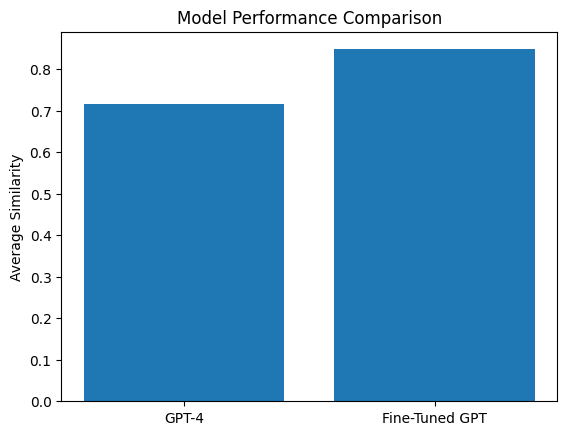

In [ ]:
import matplotlib.pyplot as plt

# Plot similarity scores
plt.bar(["GPT-4", "Fine-Tuned GPT"], [df["GPT-4 Similarity"].mean(), df["Fine-Tuned Similarity"].mean()])
plt.ylabel("Average Similarity")
plt.title("Model Performance Comparison")
plt.show()

In [ ]:
pip install tiktoken

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 10.5 MB/s eta 0:00:00


In [ ]:
import json
import tiktoken

# Load OpenAI tokenizer for GPT-4
tokenizer = tiktoken.encoding_for_model("gpt-4-turbo")

# Load the JSONL training file
jsonl_file = '/content/drive/MyDrive/data/ielts_training_data.jsonl'

total_tokens = 0
num_examples = 0

with open(jsonl_file, "r", encoding="utf-8") as f:
    for line in f:
        record = json.loads(line)

        # Extract all messages (user + assistant)
        all_text = " ".join(msg["content"] for msg in record["messages"])

        # Count tokens
        token_count = len(tokenizer.encode(all_text))
        total_tokens += token_count
        num_examples += 1

# Print final results
print(f"Total Tokens in Dataset: {total_tokens}")
print(f"Average Tokens per Example: {total_tokens / num_examples:.2f}")

Total Tokens in Dataset: 1754129
Average Tokens per Example: 1013.95


In [ ]:
cost_per_1k_tokens = 12  # For GPT-4-Turbo (update if using GPT-3.5)
total_cost = (total_tokens / 1000000) * cost_per_1k_tokens

print(f"Estimated Fine-Tuning Cost: ${total_cost:.2f}")

Estimated Fine-Tuning Cost: $21.05
